In [1]:
from ipynb.fs.defs.AutoEncoder import *

/home/bishakh17/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

network = AutoEncoder().to(device)
network = network.float()

In [3]:
network.load_state_dict(torch.load("AutoEncoder_Weights.h5"))

<All keys matched successfully>

In [4]:
images = datasets.ImageFolder("images", transform= transforms.ToTensor())

In [ ]:
def ED(x_encoded,y_encoded):

    A = x_encoded.reshape(-1)
    B = y_encoded.reshape(-1)

    distance = ((A-B)**2).sum(axis=0)

    return distance

In [5]:
batch_size = 2

data = torch.utils.data.DataLoader(dataset = images, batch_size = batch_size)

tensor(12.3432, device='cuda:0')
tensor(5.6812, device='cuda:0')
tensor(5.3915, device='cuda:0')
tensor(3.3910, device='cuda:0')
tensor(4.0938, device='cuda:0')
tensor(2.2574, device='cuda:0')
tensor(3.8334, device='cuda:0')
tensor(6.7254, device='cuda:0')
tensor(13.9267, device='cuda:0')
tensor(20.8595, device='cuda:0')
tensor(11.9882, device='cuda:0')
tensor(9.5272, device='cuda:0')
tensor(6.3867, device='cuda:0')
tensor(16.3577, device='cuda:0')
tensor(21.9137, device='cuda:0')
tensor(27.0333, device='cuda:0')
tensor(19.4798, device='cuda:0')
tensor(11.0535, device='cuda:0')
tensor(9.9180, device='cuda:0')
tensor(10.3074, device='cuda:0')


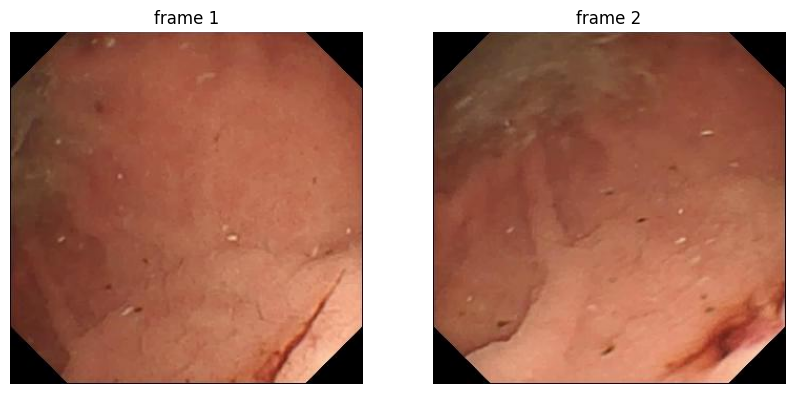

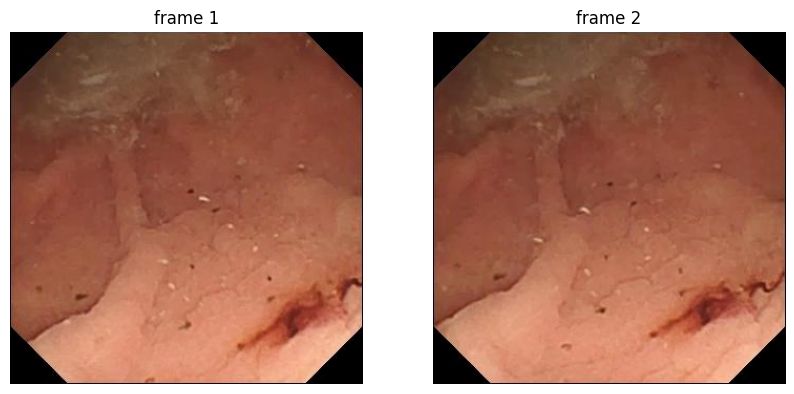

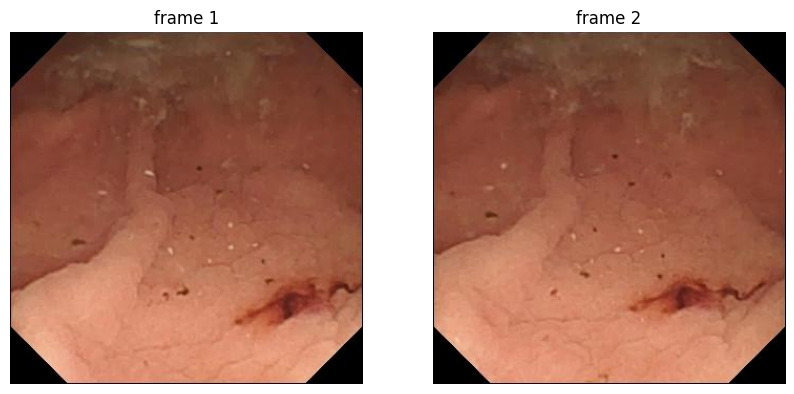

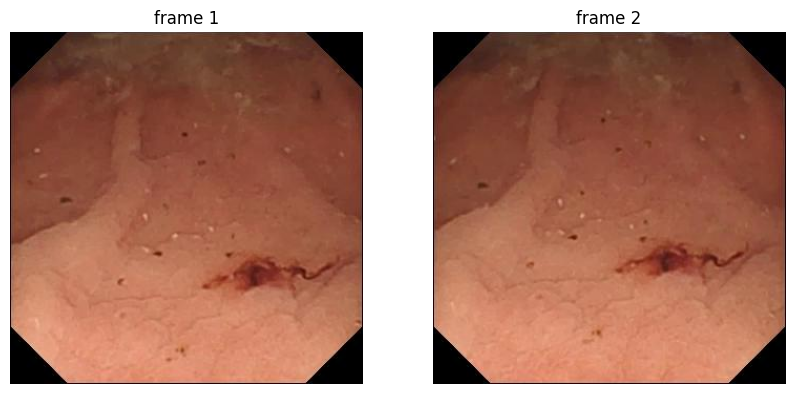

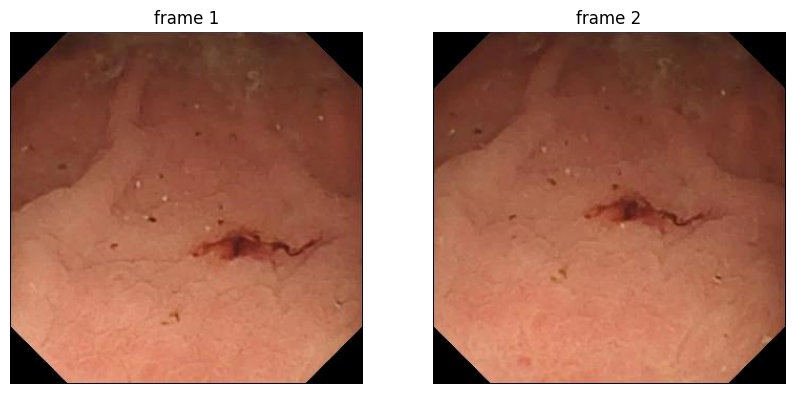

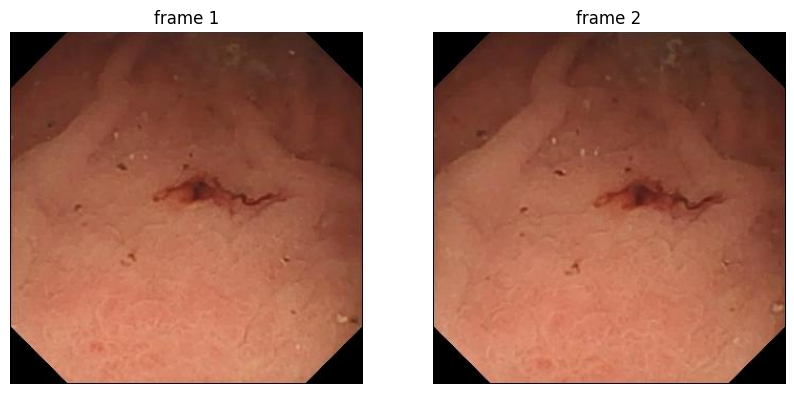

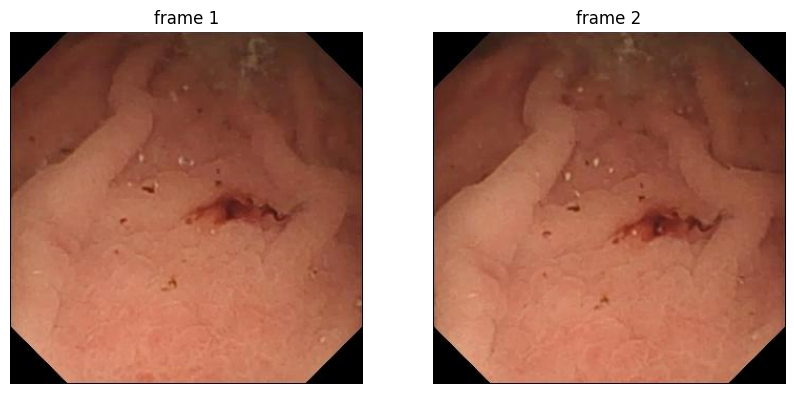

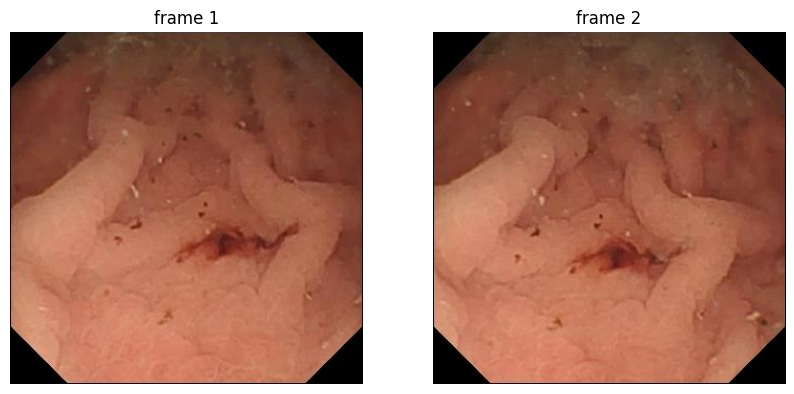

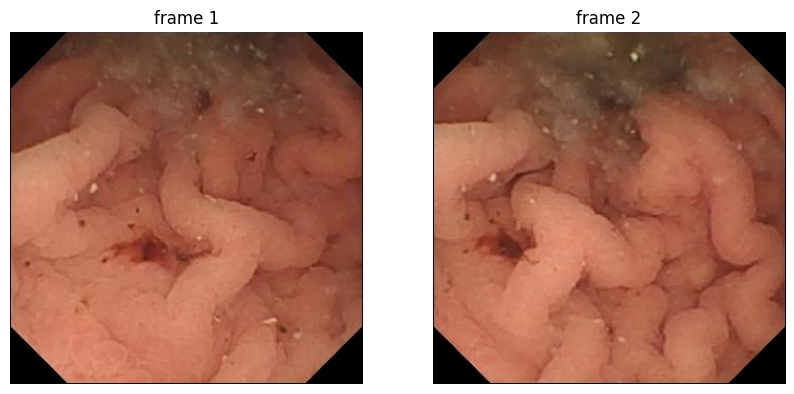

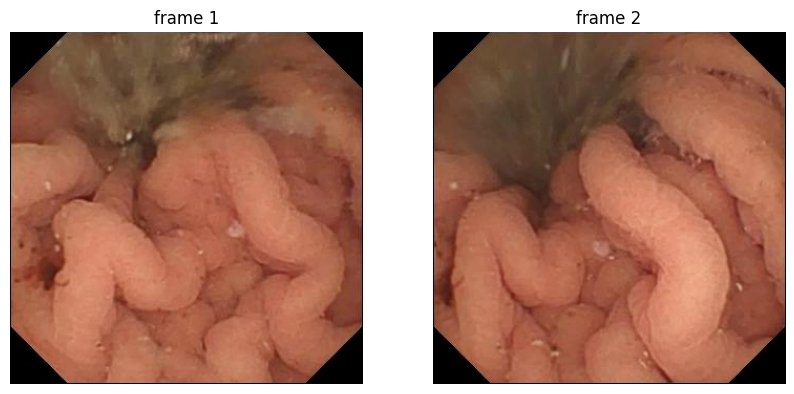

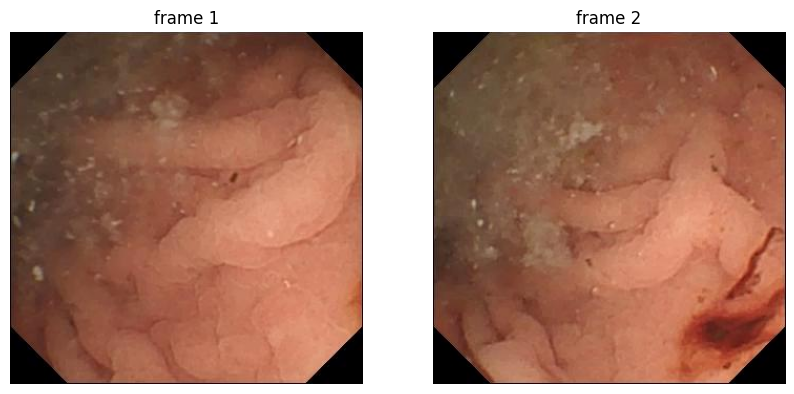

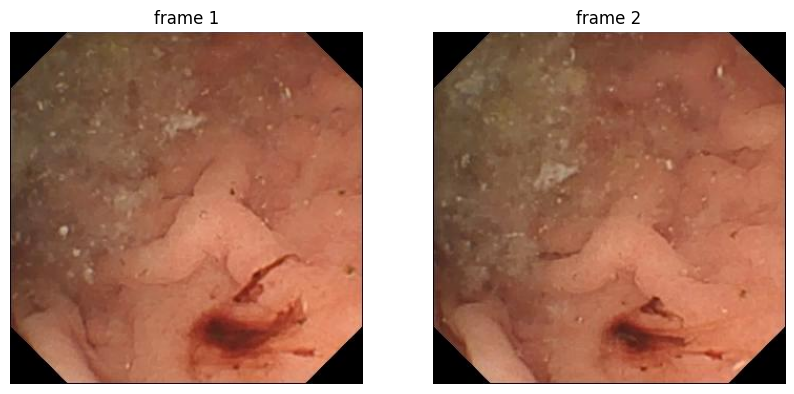

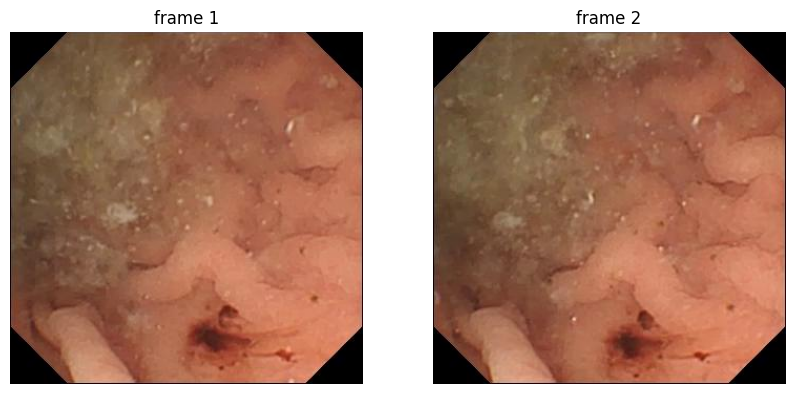

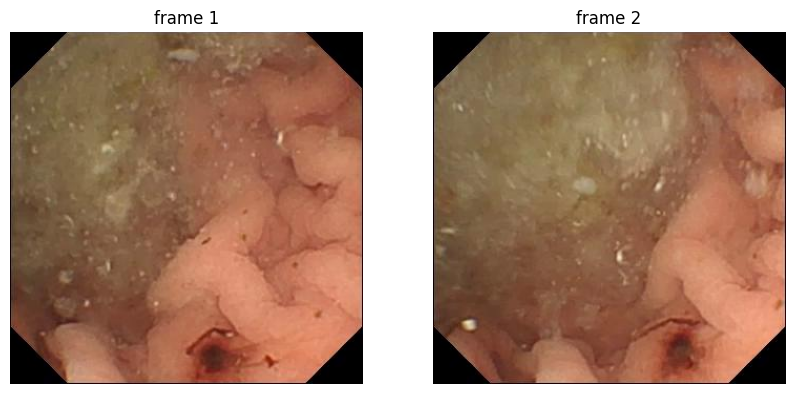

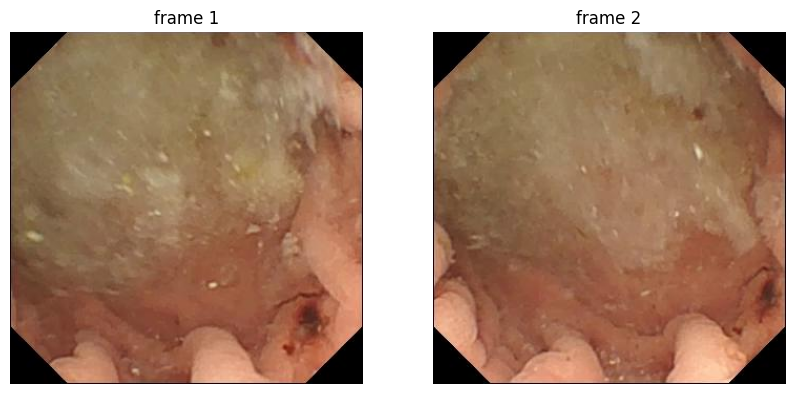

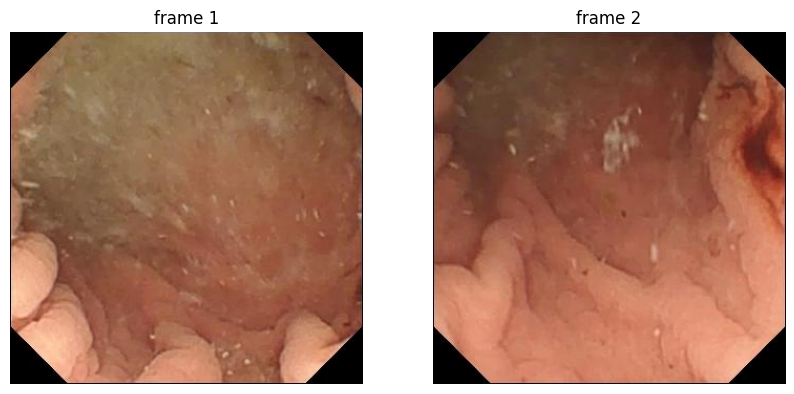

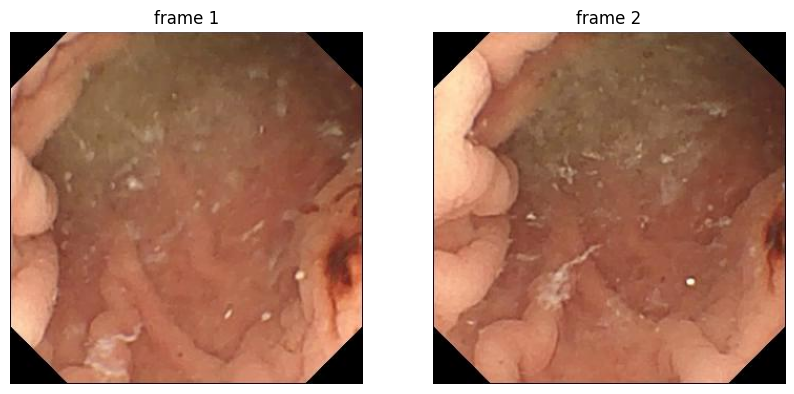

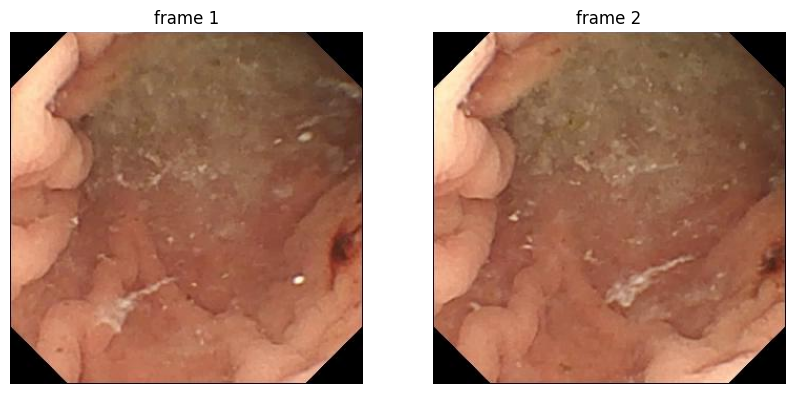

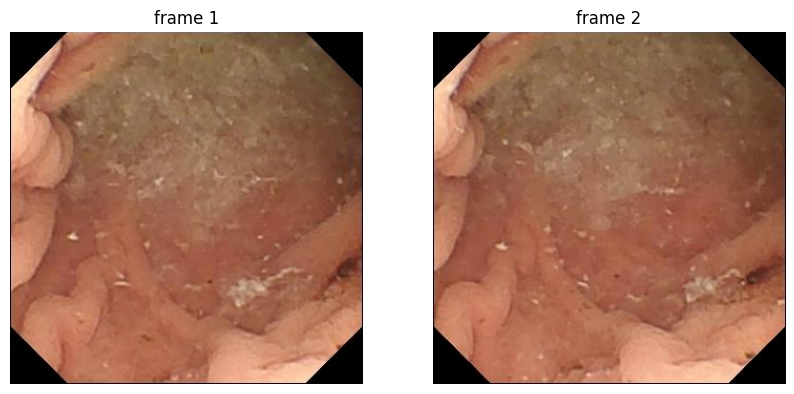

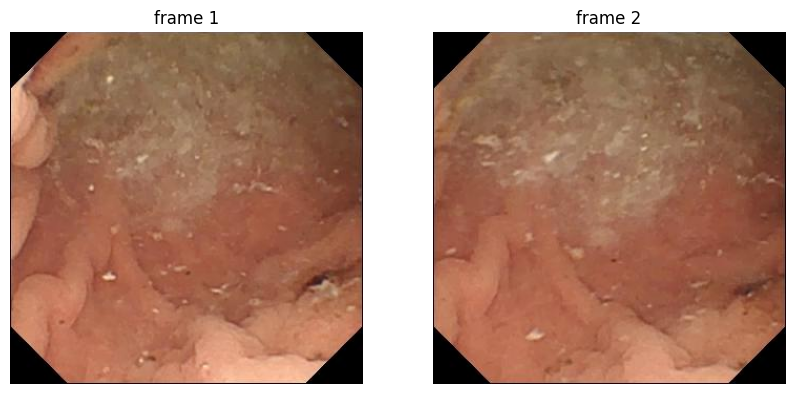

In [6]:
network.eval()

count = 0

with torch.no_grad():
    for (img,y) in data:
        img = img.to(device)
        encoded = network.encode(img)
        
        x = img[0].to('cpu')
        y = img[1].to('cpu')

        x_encoded = encoded[0]
        y_encoded = encoded[1]

        distance = ED(x_encoded,y_encoded)

        if(distance<=30):
            fig = plt.figure(figsize=(10, 7))
            rows = 1
            columns = 2

            fig.add_subplot(rows, columns, 1)
            plt.imshow(x.detach().permute((1,2,0)))
            plt.axis('off')
            plt.title('frame 1')
    
            fig.add_subplot(rows, columns, 2)
            plt.imshow(y.detach().permute((1,2,0)))
            plt.axis('off')
            plt.title('frame 2')
    
            print(distance)
            count = count+1

        if(count==20):
            break



In [5]:
import cv2
import IPython.display as ipd
from glob import glob
from tqdm.notebook import tqdm

In [3]:
path = os.getcwd()
path_videos = os.path.join(path,'videos')
path_segments = os.path.join(path,'segments')

In [8]:
path_videos

'/mnt/c/Users/Bishakh/OneDrive/Desktop/Projects/Wireless Endoscopy: Video Summarizer/videos'

In [9]:
ipd.Video(os.path.join(path_videos,'vid1.mp4'))

In [9]:
cap = cv2.VideoCapture(path)

In [10]:
fps = cap.get(cv2.CAP_PROP_FPS)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

print(f'FPS: {fps} \nDIM: {height} X {width}')

FPS: 30.0 
DIM: 336.0 X 336.0


In [ ]:
def format(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    convert = transforms.ToTensor()
    img = convert(img)
    img = img.to('cuda')
    encoded = network.encode(img)
    return encoded

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


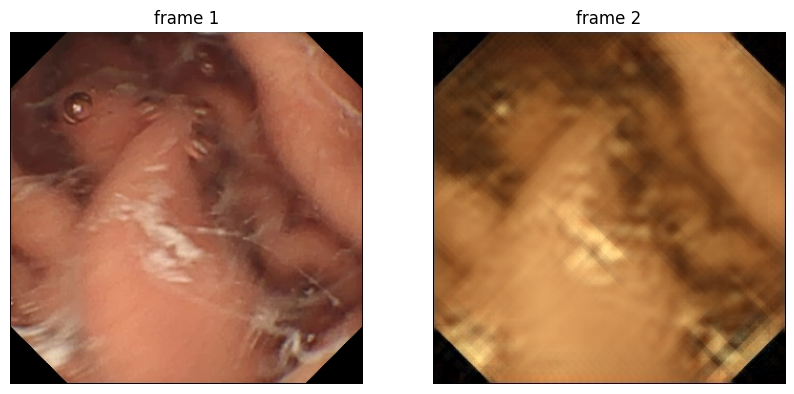

In [11]:
network.eval()

with torch.no_grad():

    segment_count = 0

    ret, img = cap.read()
    prev = format(img)
    cv2.imwrite()

    while ret:

        ret, img = cap.read()
        curr = format(img)

        distance = ED(curr,prev)

        
        



        
        

